## Video Tutorial
- https://youtu.be/CIbJSX-biu0

In [8]:
# libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [6]:
# create data
np.random.seed(6)
#1,50,000 people, mean=35, std 18
population_ages1 = stats.poisson.rvs(loc = 18, mu=35, size = 150000)
population_ages1

array([62, 59, 44, ..., 60, 58, 56])

In [35]:
np.random.seed(6)
population_ages1 = stats.poisson.rvs(loc = 18, mu=35, size = 150000)
population_ages2 = stats.poisson.rvs(loc = 18, mu=10, size = 100000) 
print(np.mean(population_ages1) , np.mean(population_ages2))
population_ages = np.concatenate((population_ages1, population_ages2))
#join both data in 1 set
pmean_value = np.mean(population_ages)
print(np.size( population_ages), population_ages, mean_value)

53.00536 27.99224
250000 [62 59 44 ... 31 37 35] 43.000112


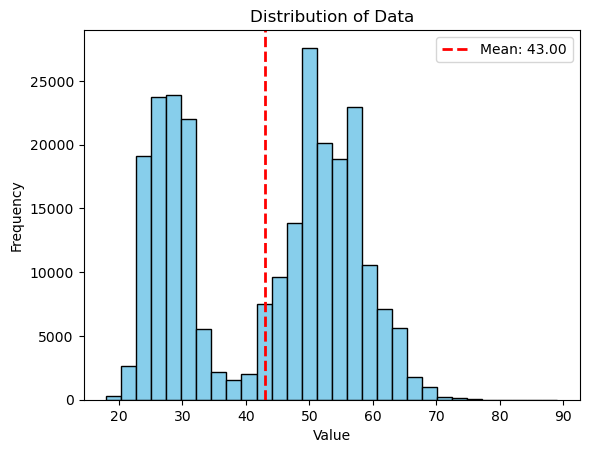

In [36]:
plt.hist(population_ages, bins=30, color='skyblue', edgecolor='black')
# Add a vertical line at the mean
plt.axvline(pmean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')
plt.legend() # Show the legend for the mean line
# Display the plot
plt.show()

# Create data for washington city
- sample size =30
- means = 30, 10

In [38]:
np.random.seed(6)
washington_ages1 = stats.poisson.rvs(loc = 18, mu=30, size = 30)
washington_ages2 = stats.poisson.rvs(loc = 18, mu=10, size = 20) 
print(np.mean(washington_ages1) , np.mean(washington_ages2))
washington_ages = np.concatenate((washington_ages1, washington_ages2))
#join both data in 1 set
wmean_value = np.mean(washington_ages)
print(np.size( washington_ages), washington_ages, wmean_value)

49.03333333333333 28.15
50 [56 54 40 48 45 47 48 54 55 53 51 41 46 44 50 59 44 52 47 51 46 53 42 45
 42 54 54 50 46 54 24 22 34 24 24 25 36 28 29 25 32 28 31 24 26 29 29 34
 30 29] 40.68


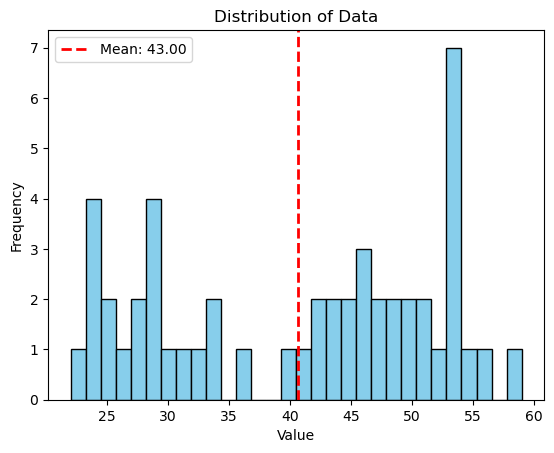

In [39]:
plt.hist(washington_ages, bins=30, color='skyblue', edgecolor='black')
# Add a vertical line at the mean
plt.axvline(wmean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')
plt.legend() # Show the legend for the mean line
# Display the plot
plt.show()

In [40]:
## Means
print(population_ages.mean(), washington_ages.mean())

43.000112 40.68


# Can we say statistically, washington ages is not part of population pattern
- Ho : washington_ages.mean() = populational_ages.mean() 
- H1 : they are different, means are not same

In [41]:
stats.ttest_1samp( a = washington_ages , popmean = population_ages.mean())

TtestResult(statistic=-1.4529825910021774, pvalue=0.1526030687946988, df=49)

#### Output
- t-stats = -2.5
- pvalue = 0.012 compare with alpha value = 0.05
    - pvalue < 0.05 : Reject Ho , in favour of H1  : means of washington city is different from population means
    - pvalue > 0.05 : Accept Ho : means of washington city = population means
- df = 49 (50 values in washington city ages - 1)

In [44]:
## t-stats
stats.t.ppf( q =.005, df=49)

-2.6799519736315505

In [46]:
# calculate t-stats
stats.t.cdf( x = -1.4529, df = 49) * 2 # for Two tail tests
# output is pvalue , as above

0.15262590855553124

In [47]:
sigma = washington_ages.std()/ math.sqrt(50)
stats.t.interval(0.95, df = 49, loc = washington_ages.mean(), scale=sigma)

(37.50337574299371, 43.85662425700629)

In [48]:
# washington mean lies in between this interval

## TWO - sample T Tests
- generate data for another city, texas

In [49]:
np.random.seed(6)
texas_ages1 = stats.poisson.rvs(loc = 18, mu=33, size = 30)
texas_ages2 = stats.poisson.rvs(loc = 18, mu=13, size = 20) 
print(np.mean(texas_ages1) , np.mean(texas_ages2))
texas_ages = np.concatenate((texas_ages1, texas_ages2))
#join both data in 1 set
tmean_value = np.mean(texas_ages)
print(np.size( texas_ages), texas_ages, tmean_value)

51.46666666666667 31.15
50 [59 57 42 51 48 50 51 57 39 57 55 49 47 53 62 46 55 50 55 49 56 45 48 45
 58 57 53 49 57 44 24 37 27 28 40 31 32 26 27 36 31 35 26 28 27 32 32 38
 34 32] 43.34


In [51]:
stats.ttest_ind(a = washington_ages, b = texas_ages, equal_var = False)
#different cities

TtestResult(statistic=-1.1780045089055222, pvalue=0.24164748065696312, df=97.99999826950105)

# output
- t stats = -1.78
- pvalues = 0.24 > 0.005 : Accept Ho : texas population is similar to population 

## Paired Tests
- Weight loss of patients before and after drug
- Mean weight before and after has changed

In [56]:
np.random.seed(11)
before = stats.norm.rvs(scale=30, loc=250,  size=100)
after = stats.norm.rvs(scale=5, loc=225,  size=100)

In [58]:
wt_df = pd.DataFrame( {'wt_before':before, 'wt_after':after, 'wt_change':after-before})
wt_df

,wt_before,wt_after,wt_change
0,302.483642,229.371364,-73.112278
1,241.417810,225.358261,-16.059550
2,235.463046,216.804742,-18.658304
3,170.400443,221.763487,51.363044
4,249.751461,229.088848,-20.662613
...,...,...,...
95,258.148189,224.773624,-33.374565
96,275.760015,223.044134,-52.715881
97,212.077790,232.671112,20.593322
98,283.446109,224.179035,-59.267073


In [59]:
wt_df.describe()

,wt_before,wt_after,wt_change
count,100.000000,100.000000,100.000000
mean,250.345546,225.019625,-25.325921
std,28.132539,4.783696,28.650070
min,170.400443,214.754714,-86.430108
25%,230.421042,222.203789,-46.655759
50%,250.830805,224.836537,-25.990130
75%,270.637145,227.988673,-6.262506
max,314.700233,236.009282,51.363044


In [60]:
stats.ttest_rel(a = before, b =after)

TtestResult(statistic=8.839741381536872, pvalue=3.694872593869135e-14, df=99)

# Output


# Type -1  & Type-II error